<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Backpropagation Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Implement a 3 input, 4 node hidden-layer, 1 output node Multilayer Perceptron on the following dataset:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 0  | 0  | 1  | 0 |
| 0  | 1  | 1  | 1 |
| 1  | 0  | 1  | 1 |
| 0  | 1  | 0  | 1 |
| 1  | 0  | 0  | 1 |
| 1  | 1  | 1  | 0 |
| 0  | 0  | 0  | 0 |

If you look at the data you'll notice that the first two columns behave like an XOR gate while the last column is mostly just noise. Remember that creating an XOR gate was what the perceptron was criticized for not being able to learn. 

In [2]:
##### Your Code Here #####
import numpy as np

X = np.array(([0,0,1],[0,1,1],
              [1,0,1],[0,1,0],
              [1,0,0],[1,1,1],
              [0,0,0]), dtype=float)

y = np.array(([0],[1],[1],[1],[1],[0],[0]))

In [4]:
# I want activations that correspond to negative weights to be lower
# and activations that correspond to positive weights to be higher

class NeuralNetwork:
    def __init__(self):
        # Set up Architecture of Neural Network
        self.inputs = 3
        self.hiddenNodes = 4
        self.outputNodes = 1

        # Initial Weights
        
        # 3x4 Matrix Array for the First Layer
        self.weights1 = np.random.randn(self.inputs, self.hiddenNodes)
        
       
        # 4x1 Matrix Array for Hidden to Output
        self.weights2 = np.random.randn(self.hiddenNodes, self.outputNodes)
    
    def sigmoid(self, s):
        return 1/(1+np.exp(-s))
    
    def sigmoidPrime(self, s):
        return s *(1-s)
    
    def feed_forward(self, X):
        """Calculate NN inference using feed forward pass"""
        
        #weighted sum of input and hidden layers
        self.hidden_sum = np.dot(X, self.weights1)
        
        #Activation of weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
        #weighted sum of hidden to output
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        
        #final activation of output
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
    
    def backward(self, X, y, o):
        
        self.o_error = y - o #error in output
        
        #size of adjust output to hidden
        self.o_delta = self.o_error * self.sigmoidPrime(o) # apply derivative of sig to error
        
        #z2 error is hidden layer to input weights are off by
        self.z2_error = self.o_delta.dot(self.weights2.T)
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.activated_hidden)
        
        #adjust hidden to output
        self.weights2 += self.activated_hidden.T.dot(self.o_delta)
        #adjust input to hidden
        self.weights1 += X.T.dot(self.z2_delta)
        
        
    def train(self, X, y):
        o = self.feed_forward(X)
        self.backward(X, y, o)

In [6]:
# Train my 'net
nn = NeuralNetwork()

for i in range(10000):
    if (i+1 in [1,2,3,4,5]) or ((i+1) % 50 ==0):
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---'*3 + '+')
        print('Input: \n', X)
        print('Actual Output: \n', y)
        print('Predicted Output: \n', str(nn.feed_forward(X)))
        print("Loss: \n", str(np.mean(np.square(y - nn.feed_forward(X)))))
    nn.train(X,y)

+---------EPOCH 1---------+
Input: 
 [[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]]
Actual Output: 
 [[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]]
Predicted Output: 
 [[0.22428335]
 [0.51100015]
 [0.29683567]
 [0.56765372]
 [0.46191114]
 [0.55047886]
 [0.35263939]]
Loss: 
 0.24110120027778265
+---------EPOCH 2---------+
Input: 
 [[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]]
Actual Output: 
 [[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]]
Predicted Output: 
 [[0.3006281 ]
 [0.6020781 ]
 [0.39878376]
 [0.62217187]
 [0.53932086]
 [0.63877558]
 [0.41325516]]
Loss: 
 0.22056764313895588
+---------EPOCH 3---------+
Input: 
 [[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]]
Actual Output: 
 [[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]]
Predicted Output: 
 [[0.34252598]
 [0.64695427]
 [0.45915087]
 [0.64920391]
 [0.58032927]
 [0.68184876]
 [0.44313944]]
Loss: 
 0.21356497593002297
+---------EPOCH 4---------+
Input:

In [7]:
### self implemented NN above

##true gd implement below from Welch Labs


class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 3
        self.outputLayerSize = 1
        self.hiddenLayerSize = 4
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))


In [9]:
from scipy import optimize
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [10]:
NN = Neural_Network()

In [11]:
T = trainer(NN)

In [12]:
T.train(X,y)

Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 44
         Function evaluations: 48
         Gradient evaluations: 48


In [16]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
print("Predicted Output: \n" + str(NN.forward(X))) 
print("Loss: \n" + str(np.mean(np.square(y - NN.forward(X))))) # mean sum squared loss

Predicted Output: 
[[0.000000]
 [0.999511]
 [0.999577]
 [0.999988]
 [0.999990]
 [0.000792]
 [0.000000]]
Loss: 
1.4948883740198073e-07


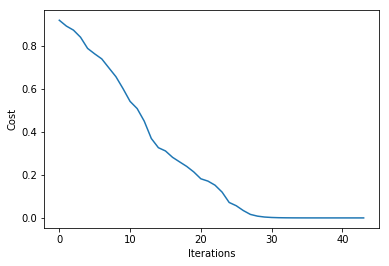

In [15]:
import matplotlib.pyplot as plt
plt.plot(T.J)
#plt.ylim(top=.002, bottom = 0)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

## Try building/training a more complex MLP on a bigger dataset.

Use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) to build the cannonical handwriting digit recognizer and see what kind of accuracy you can achieve. 

If you need inspiration, the internet is chalk-full of tutorials, but I want you to see how far you can get on your own first. I've linked to the original MNIST dataset above but it will probably be easier to download data through a neural network library. If you reference outside resources make sure you understand every line of code that you're using from other sources, and share with your fellow students helpful resources that you find.


In [1]:
##### Your Code Here #####
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 54s 5us/step


In [7]:
x_train.shape

(60000, 28, 28)

In [9]:
#28,28

class NeuralNetwork:
    def __init__(self):
        # Set up Architecture of Neural Network
        self.inputs = 28
        self.hiddenNodes = 28
        self.outputNodes = 1

        # Initial Weights
        
        # 2x3 Matrix Array for the First Layer
        self.weights1 = np.random.randn(self.inputs, self.hiddenNodes)
        
       
        # 3x1 Matrix Array for Hidden to Output
        self.weights2 = np.random.randn(self.hiddenNodes, self.outputNodes)
    
    def sigmoid(self, s):
        return 1/(1+np.exp(-s))
    
    def sigmoidPrime(self, s):
        return s *(1-s)
    
    def feed_forward(self, X):
        """Calculate NN inference using feed forward pass"""
        
        #weighted sum of input and hidden layers
        self.hidden_sum = np.dot(X, self.weights1)
        
        #Activation of weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
        #weighted sum of hidden to output
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        
        #final activation of output
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
    
    def backward(self, X, y, o):
        
        self.o_error = y - o #error in output
        
        #size of adjust output to hidden
        self.o_delta = self.o_error * self.sigmoidPrime(o) # apply derivative of sig to error
        
        #z2 error is hidden layer to input weights are off by
        self.z2_error = self.o_delta.dot(self.weights2.T)
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.activated_hidden)
        
        #adjust hidden to output
        self.weights2 += self.activated_hidden.T.dot(self.o_delta)
        #adjust input to hidden
        self.weights1 += X.T.dot(self.z2_delta)
        
        
    def train(self, X, y):
        o = self.feed_forward(X)
        self.backward(X, y, o)

In [11]:
# Train my 'net
nn = NeuralNetwork()

for i in range(1000):
    if (i+1 in [1,2,3,4,5]) or ((i+1) % 50 ==0):
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---'*3 + '+')
        print('Input: \n', X)
        print('Actual Output: \n', y)
        print('Predicted Output: \n', str(nn.feed_forward(X)))
        print("Loss: \n", str(np.mean(np.square(y - nn.feed_forward(X)))))
    nn.train(X,y)

+---------EPOCH 1---------+
Input: 
 [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
Actual Output: 
 [5 0 4 ... 5 6 8]
Predicted Output: 
 [[[0.73871876]
  [0.73871876]
  [0.73871876]
  ...
  [0.73871876]
  [0.73871876]
  [0.73871876]]

 [[0.73871876]
  [0.73871876]
  [0.7

NameError: name 'y' is not defined

## Stretch Goals: 

- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?